# Diabetes Disease Prediction using Python 

In this project, we are going to train machine learning algorithm models with input features from the diabetes dataset to predict the outcome, whether the type of diabetes is Benign or Malignant

1. 0  = Benign: not all the serious
2. 1 = Malignant: tending to produce death

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
# load dataset
diabetes = pd.read_csv(r"C:\Users\Administrator\Desktop\Datasets\diabetes.csv")

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
diabetes["Outcome"] = diabetes["Outcome"].map({0:'B',1:'M'})

In [16]:

diabetes.shape

(768, 9)

In [17]:
# Descriptive statistics
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Lets Visualize the dataset

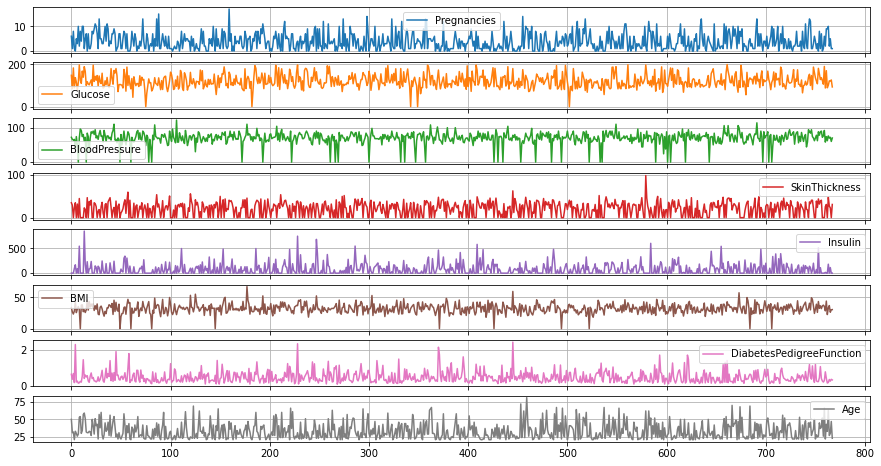

In [18]:
diabetes.plot(subplots=True, figsize=(15,8), grid=True)
plt.show()

### Lets check the correlation between the variables

In [19]:
# Check relationship between variable
diabetes_corr = diabetes.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10616\3175733861.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  diabetes_corr = diabetes.corr()


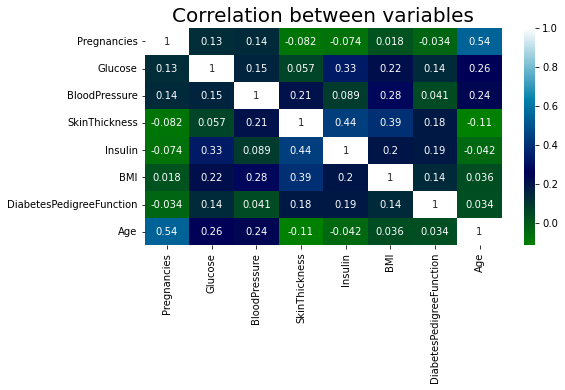

In [20]:
plt.figure(figsize=(8,4))
sns.heatmap(diabetes_corr, annot=True, cmap='ocean')
plt.title('Correlation between variables', fontsize=20)
plt.show()

### Age and BloodPressure Trends

In [21]:
age_BP = diabetes[['Age','BloodPressure']]
age_BP.head()

,Age,BloodPressure
0,50,72
1,31,66
2,32,64
3,21,66
4,33,40


<Figure size 1440x720 with 0 Axes>

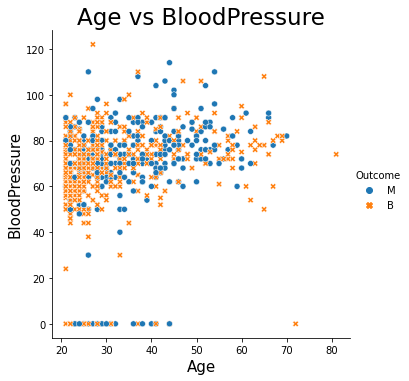

In [22]:
plt.figure(figsize=(20,10))
sns.relplot(data=age_BP, x='Age', y='BloodPressure',hue=diabetes['Outcome'],style=diabetes['Outcome'])
plt.xlabel('Age',fontsize=15)
plt.ylabel('BloodPressure',fontsize=15)
plt.title("Age vs BloodPressure", fontsize=23)
plt.show()

### Split the dataset into feature and target size

In [175]:
# X - feature
# Y- Target

x = diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].values
y= diabetes['Outcome'].values

In [176]:
print(x.shape)
print(y.shape)

(768, 8)
(768,)


## Train Test split

In [177]:
# split the dataset into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)


In [178]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


## Standardize the data

In [179]:
# Standardize the train dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.fit_transform(x_test)

## Training and Testing of ML model

#### 1. LogisticRegression model

In [180]:
logisticR = LogisticRegression()

In [181]:
# train the model
logisticR.fit(x_train_scaled,y_train)

LogisticRegression()

In [182]:
score =logisticR.score(x_test_scaled,y_test)

In [183]:
# predict the target
y_pred = logisticR.predict(x_test_scaled)

In [184]:
y_pred[:10]

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M'], dtype=object)

### Prediction and Evaluations

In [185]:
from sklearn.metrics import classification_report

In [186]:
print(logisticR.score(x_test_scaled,y_test))

0.7445887445887446


In [187]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.79      0.82      0.81       151
           M       0.64      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [188]:
from sklearn import metrics

In [189]:
cm = metrics.confusion_matrix(y_pred, y_test)

In [190]:
cm

array([[124,  32],
       [ 27,  48]], dtype=int64)

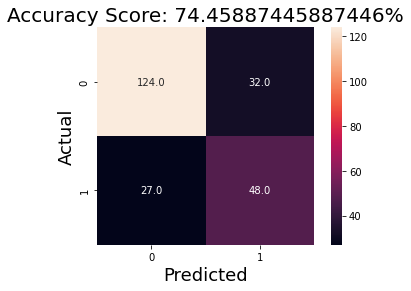

In [191]:
sns.heatmap(cm, annot=True, square=True, fmt='.1f')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)
title = 'Accuracy Score: {0}%'.format(score*100)
plt.title(title, size=20)
plt.show()

#### 2. Support Vector Machine

In [192]:
## Train

from sklearn.svm import SVC

model_svc = SVC()

model_svc.fit(x_train,y_train)

pred = model_svc.predict(x_test)



In [193]:
# Test the model

score = model_svc.score(x_test,y_test)

In [194]:
print(score*100)

73.59307359307358


In [195]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           B       0.76      0.87      0.81       151
           M       0.66      0.49      0.56        80

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



In [196]:
pd.crosstab(y_test,pred)

col_0,B,M
row_0,,
B,131,20
M,41,39


In [197]:
## The Accuracy of the model is 74%

## GridSearch to improve the model accuracy

In [198]:
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf']}

In [199]:
from sklearn.model_selection import GridSearchCV

In [200]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

### Train the GridSearchCV model

In [201]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.645 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.648 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.648 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.645 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

### Test the model



In [202]:
grid_predict = grid.predict(x_test)

In [203]:
# Check best grid values

grid.best_estimator_

SVC(C=1, gamma=0.001)

In [204]:
grid.best_score_

0.7504153686396677

In [205]:
print(grid.score(x_test,y_test))

0.7056277056277056


In [206]:
print(classification_report(y_test,grid_predict))

              precision    recall  f1-score   support

           B       0.76      0.80      0.78       151
           M       0.58      0.53      0.55        80

    accuracy                           0.71       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.70      0.71      0.70       231



In [207]:
pd.crosstab(y_test,grid_predict)

col_0,B,M
row_0,,
B,121,30
M,38,42


### 3. DecisionTreeClassifier

In [208]:
from sklearn.tree import DecisionTreeClassifier

In [209]:
## Train the model
tree_model = DecisionTreeClassifier()

tree_model.fit(x_train,y_train)

tree_pred = tree_model.predict(x_test)

In [210]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           B       0.81      0.72      0.76       151
           M       0.57      0.69      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.72       231



In [211]:
pd.crosstab(y_test,tree_pred)

col_0,B,M
row_0,,
B,109,42
M,25,55


### 4. RandomForestClassifier()

In [212]:
from sklearn.ensemble import RandomForestClassifier

In [213]:
# Train the model

RFC = RandomForestClassifier(ccp_alpha=0.01)
RFC.fit(x_train,y_train)

rfc_pred = RFC.predict(x_test)

In [214]:
print(RFC.score(x_test,y_test))

0.7532467532467533


In [215]:
pd.crosstab(y_test,rfc_pred)

col_0,B,M
row_0,,
B,129,22
M,35,45


In [216]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           B       0.79      0.85      0.82       151
           M       0.67      0.56      0.61        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



The Average model accuracy is 74% for all the all algorithms used.

That means there is something that we need to consider outside the dataset.